# Patricia Regina Mendes


In [1]:
import pandas as pd
import matplotlib
import plotly
import plotly.graph_objs as go
import cufflinks as cf
import plotly.offline as py 
import seaborn as sns

In [3]:
microdados = pd.read_parquet('/content/drive/MyDrive/desafio-data-analyst-main/desafio-data-analyst-main/data/selling_games.parquet') 


In [4]:
microdados

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


**Primeiro exercicio**: Evolução dos vendidos Globalmente por Genero.


In [5]:
ColunasSelecionadas = [ 'Genre','Global_Sales' ]

In [6]:
primeiroExe = microdados.filter(items=ColunasSelecionadas).groupby('Genre').sum().sort_values(by='Global_Sales', ascending = False)


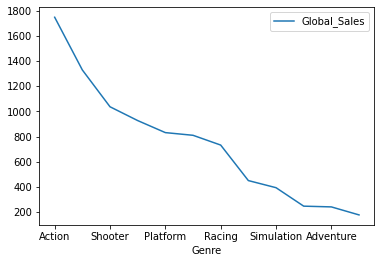

In [7]:
primeiroExe.plot()

**Segundo exercicio** Grafico linhas evolução venda NA, EU, JP e outros paises, por Genero

In [62]:
ColunasSelecionadas = ['Name','Genre','Global_Sales' ]

In [63]:
segundoExe = microdados.filter(items=ColunasSelecionadas).groupby('Genre').sum()


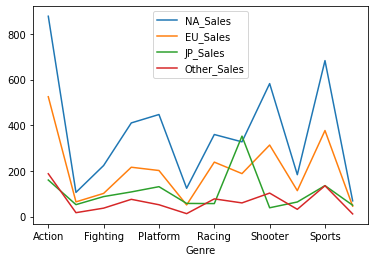

In [58]:
segundoExe.plot()

**Terceiro Exercicio** Evolução por Plataforma de Jogo. 


In [65]:
ColunasSelecionadas = ['Platform','Global_Sales']

In [66]:
terceiroExe = microdados.filter(items=ColunasSelecionadas).groupby('Platform').sum().sort_values(by='Global_Sales', ascending = False)

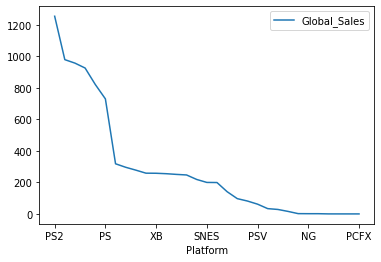

In [67]:
terceiroExe.plot()

**Quarto exercico** :Rank de 5 jogos mais vendidos


In [9]:
ColunasSelecionadas = ['Name','Genre','Publisher','Platform', 'Global_Sales' ]

In [15]:
quartoExe = microdados.filter(items=ColunasSelecionadas).groupby(['Name','Genre','Publisher']).sum().sort_values(by='Global_Sales', ascending = False)

In [16]:
quartoExe.head()

,,,Global_Sales
Name,Genre,Publisher,
Wii Sports,Sports,Nintendo,82.74
Grand Theft Auto V,Action,Take-Two Interactive,55.92
Super Mario Bros.,Platform,Nintendo,45.31
Tetris,Puzzle,Nintendo,35.84
Mario Kart Wii,Racing,Nintendo,35.82


# Conclusão

Com base no estudo de dados, é possivel verificar que o Genero de jogo mais vendido seria de Sport, sendo o jogo Will Sport da Nintendo.
A plataforma mais utilzada é do PS2. Podemos analisar também que na America do Norte e a região que mais possuem jogos vendidos, do genero de Ação. 

**CODIGOS ADICIONAIS PARA ESTUDO**

In [11]:
microdados.columns.values

array(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype=object)

In [9]:
colunaName = microdados['Name']

In [10]:
colunaName

0                                              Wii Sports
1                                       Super Mario Bros.
2                                          Mario Kart Wii
3                                       Wii Sports Resort
4                                Pokemon Red/Pokemon Blue
                               ...                       
16593                  Woody Woodpecker in Crazy Castle 5
16594                       Men in Black II: Alien Escape
16595    SCORE International Baja 1000: The Official Game
16596                                          Know How 2
16597                                    Spirits & Spells
Name: Name, Length: 16598, dtype: object

In [16]:
colunaName.value_counts().sort_index()

'98 Koshien                                1
.hack//G.U. Vol.1//Rebirth                 1
.hack//G.U. Vol.2//Reminisce               1
.hack//G.U. Vol.2//Reminisce (jp sales)    1
.hack//G.U. Vol.3//Redemption              1
                                          ..
thinkSMART: Chess for Kids                 1
uDraw Studio                               1
uDraw Studio: Instant Artist               2
wwe Smackdown vs. Raw 2006                 1
¡Shin Chan Flipa en colores!               1
Name: Name, Length: 11493, dtype: int64

In [17]:
colunaPlatform = microdados['Platform']
colunaYear =  microdados['Year']
colunaGenre = microdados['Genre']
colunaPublisher = microdados['Publisher']
colunaNASales = microdados['NA_Sales']
colunaEUSales =  microdados['EU_Sales']
colunaJPSales = microdados['JP_Sales']
colunasOtherSales = microdados['Other_Sales']
colunaGlobalSales =  microdados['Global_Sales']

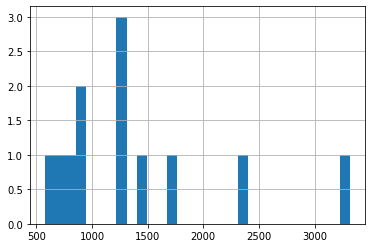

In [101]:
colunaGenre.value_counts().hist(bins=30 )

In [35]:
microdados.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
plotly.offline.init_notebook_mode(connected=True)


In [86]:
Vendas_por_genero = microdados.groupby(by='Genre').Global_Sales.sum()

In [87]:
Vendas_por_genero.head()

Genre
Action       1751.18
Adventure     239.04
Fighting      448.91
Misc          809.96
Platform      831.37
Name: Global_Sales, dtype: float64

In [ ]:
plotly.offline.init_notebook_mode(connected=True)


In [74]:
data = [go.Bar(x = Vendas_por_genero, y=colunaGlobalSales.value_counts(), marker = {'color': 'lightblue'})]

In [75]:
configuracoes_layout = go.Layout( title ='Vendas no Período', 
                                yaxis={'title':'Valores em vendas'},
                                xaxis={'title':'Período'})


In [76]:
fig = go.Figure(data =data, layout=configuracoes_layout)


In [83]:
data = [go.Scatter(x=Vendas_por_genero.index,
                   y=Vendas_por_genero.values)]



In [ ]:
py.iplot(data)

In [94]:
test = microdados.filter(items=['Genre','Global_Sales']).groupby('Genre').count().sort_values(by = 'Global_Sales',ascending=False)

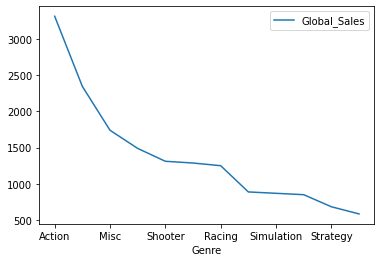

In [95]:
test.plot()

In [96]:
 import matplotlib.pyplot as plt

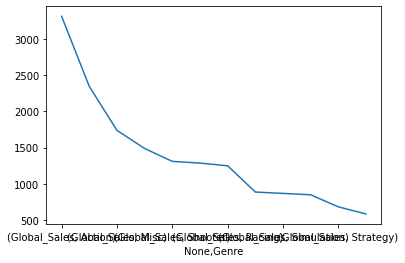

In [100]:
microdados.filter(items=['Genre','Global_Sales'])\
                 .groupby('Genre')\
                 .count().sort_values(by = 'Global_Sales',ascending=False)\
                 .unstack().plot()